In [1]:
from src.test_non_local_model import load_data

is_ripple, spikes, position, env, time = load_data(work_computer=True)


Cupy is not installed or GPU is not detected. Ignore this message if not using GPU
/home/edeno/miniconda3/envs/test_hmm/lib/python3.10/site-packages/replay_trajectory_classification/likelihoods/multiunit_likelihood.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


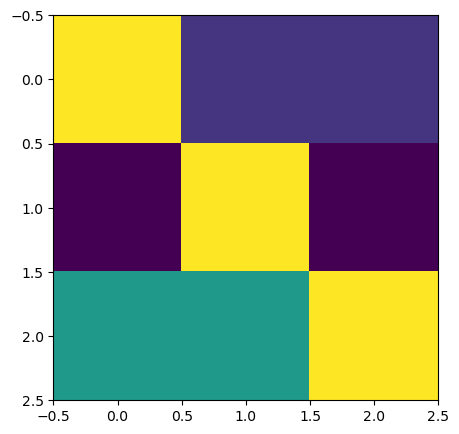

In [2]:
from src.test_non_local_model import setup_nonlocal_hmm_model

(
    design_matrix_hmm,
    predict_matrix_hmm,
    discrete_state_transitions_hmm,
    zero_rates_hmm,
    is_training_hmm,
    state_names_hmm,
) = setup_nonlocal_hmm_model(is_ripple, spikes, position, env)


In [3]:
from src.test_non_local_model import fit_hmm_model

(
    predicted_state_hmm,
    acausal_posterior_hmm,
    causal_posterior_hmm,
    marginal_log_likelihoods_hmm,
    non_local_rates_hmm,
) = fit_hmm_model(
    spikes,
    design_matrix_hmm,
    predict_matrix_hmm,
    discrete_state_transitions_hmm,
    zero_rates_hmm,
    is_training_hmm,
)


Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
from src.test_non_local_model import setup_nonlocal_switching_model

(
    design_matrix_switching,
    predict_matrix_switching,
    discrete_state_transitions_switching,
    continuous_state_transitions_switching,
    state_ind_switching,
    zero_rates_switching,
    is_training_switching,
    state_names_switching,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    env,
)


In [ ]:
from src.test_non_local_model import fit_switching_model

(
    predicted_state_switching,
    acausal_posterior_switching,
    acausal_state_probabilities_switching,
    causal_posterior_switching,
    marginal_log_likelihoods_switching,
    coefficients_iter,
    local_rates_iter,
    non_local_rates_iter,
    is_training_iter,
    acausal_posterior_iter,
) = fit_switching_model(
    position,
    spikes,
    design_matrix_switching,
    predict_matrix_switching,
    discrete_state_transitions_switching,
    continuous_state_transitions_switching,
    state_ind_switching,
    zero_rates_switching,
    is_training_switching,
)
